<hr style="color:green" />
<h1 style="color:green">COSC2673 Assignment 2: Image Classification for Cancerous Cells</h1>
<h2 style="color:green">File 02: Image Data Load for Main Label</h2>
<hr style="color:green" />

<p>
In this file, load the image data files for the Main File, and convert them in memory to 
a format that is machine learnable
</p>

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

from PIL import Image
import glob

import pandas as pd


import data_basic_utility as dbutil
import graphing_utility as graphutil
import statistics_utility as statsutil

tf.__version__
randomSeed = dbutil.get_random_seed()

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


First, Load the Main Label data

In [2]:
# Use these locations for Google Colab, where we need the Github version of the file
# locationMain = "https://raw.githubusercontent.com/s2105802-Nelson/COSC2673-A2-Group42/main/Image_classification_data/data_labels_mainData.csv?token=GHSAT0AAAAAACBUMPCH5CK2I562VIUK4US4ZCB3SFQ"

# Use these locations for Nelson's local version of the file
locationMain = "./Image_classification_data/data_labels_mainData.csv"
imageFolderPath = "./Image_classification_data/patch_images/"

dfMain = pd.read_csv(locationMain)

dfMain.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [3]:
lstIds = dfMain["InstanceID"]

# Assume that the Validation and Test Splits will be the same size, set this so we have a 60/20/20 split
train_size = 0.6

lstTrainIds, lstValTestIds = train_test_split(lstIds, test_size=(1-train_size), random_state=randomSeed)
lstValIds, lstTestIds = train_test_split(lstValTestIds, test_size=0.5, random_state=randomSeed)

print(len(lstTrainIds))
print(len(lstValIds))
print(len(lstTestIds))

# Spot check the Test Ids
print("Test Ids:")
print(lstTestIds)

5937
1979
1980
Test Ids:
1973    15710
8151     3495
1219     4960
2142     4504
7210    19009
        ...  
9413    21126
6382     8151
2669    18351
3764      590
3548      350
Name: InstanceID, Length: 1980, dtype: int64


Now, Loop through the Image folder. Load the image data but only if it exists in the main label data

In [4]:
lstImages = []

stepCount = 0
for filepath in glob.glob(imageFolderPath + '*.png', recursive=True): #assuming gif
    # Get the name of the file
    filename = filepath.split("\\")[-1]

    # Check if there is a matching record in the Main Label data, if so, add it to the dataframe
    isCancerous = -1
    cellType = -1
    trainValTest = 0
    dfLabelRecs = dfMain[dfMain["ImageName"] == filename]
    
    if dfLabelRecs.shape[0] > 0:
        # found a record, get the labels and append it with the file to the list
        isCancerous = dfLabelRecs.iloc[0]["isCancerous"]
        cellType = dfLabelRecs.iloc[0]["cellType"]
        id = dfLabelRecs.iloc[0]["InstanceID"]

        if id in lstValIds:
            trainValTest = 1
        elif id in lstTestIds:
            trainValTest = 2

        lstImages.append((filepath, isCancerous, cellType, trainValTest))

    # Print just the first 10 of the data to ensure we are on track
    stepCount += 1
    if stepCount < 10:
        print(filename + ", isCancerous=" + str(isCancerous) + ", cellType=" + str(cellType))

1.png, isCancerous=0, cellType=0
10.png, isCancerous=0, cellType=0
100.png, isCancerous=1, cellType=2
1000.png, isCancerous=1, cellType=2
10000.png, isCancerous=0, cellType=1
10001.png, isCancerous=0, cellType=1
10002.png, isCancerous=0, cellType=1
10003.png, isCancerous=0, cellType=1
10004.png, isCancerous=0, cellType=1


In [5]:
# Create a data frame
dfImages = pd.DataFrame(data=lstImages, columns=['ImageName', 'isCancerous', 'cellType', 'trainValTest'])
dfImages.head()

,ImageName,isCancerous,cellType,trainValTest
0,./Image_classification_data/patch_images\1.png,0,0,0
1,./Image_classification_data/patch_images\10.png,0,0,0
2,./Image_classification_data/patch_images\100.png,1,2,0
3,./Image_classification_data/patch_images\1000.png,1,2,0
4,./Image_classification_data/patch_images\10000...,0,1,0


Plot some random images and review

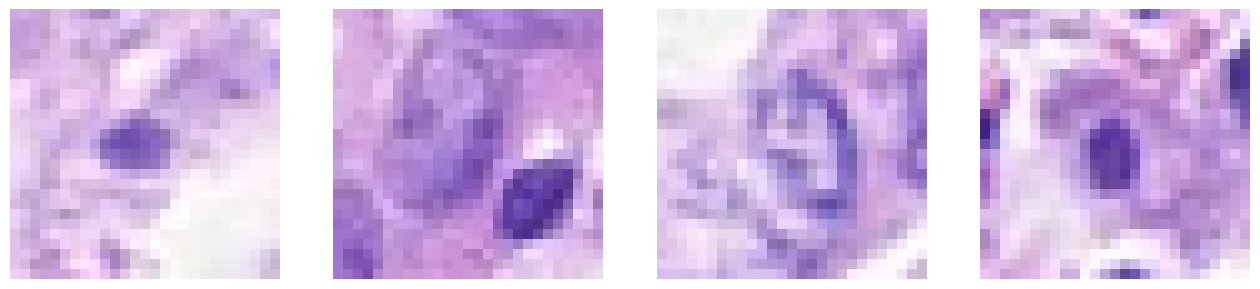

In [6]:
r_inx = np.random.choice(100, 4)
rand_data = dfImages.loc[r_inx,'ImageName']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

Write the images dataframe to file, that can be used by other tensorflow models later


In [7]:
dfImages.to_csv("images_main.csv", index=False)